<class 'numpy.ndarray'>


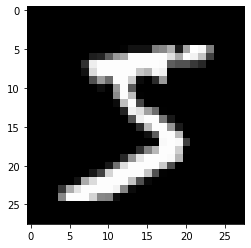

In [28]:
from mnist import MNIST
import numpy as np 
import matplotlib.pyplot as plt
mndata = MNIST('./sample')

x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(type(x_train))
plt.imshow(np.array(x_train[0]).reshape(28,28), cmap='gray')

In [29]:
x_train =x_train/255.0
x_test = x_test/255.0
# print(x_train, x_test)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.shape)
print(x_train)

(60000, 28, 28, 1) (10000, 28, 28, 1)
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
 

In [30]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# # from sklearn_export import export
# logistic = LogisticRegression()
# logistic.fit(x_train.reshape(-1,784), y_train)
# y_pred = logistic.predict(x_test.reshape(-1,784))
# # print(accuracy_score(y_test, y_pred))
# # print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [31]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(x_train.reshape(-1,784), y_train)
# y_pred = knn.predict(x_test.reshape(-1,784))
# # print(accuracy_score(y_test, y_pred))
# # print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [32]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
optimizer = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\conda\envs\Tensorflow_RTX_Ampere\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=200, batch_size=32,callbacks = early_stopping,  validation_split=0.2)

Epoch 1/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2650 - accuracy: 0.9201 - val_loss: 0.1133 - val_accuracy: 0.9663
Epoch 2/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0897 - accuracy: 0.9728 - val_loss: 0.0709 - val_accuracy: 0.9780
Epoch 3/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0702 - val_accuracy: 0.9805
Epoch 4/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0563 - val_accuracy: 0.9829
Epoch 5/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0298 - accuracy: 0.9899 - val_loss: 0.0645 - val_accuracy: 0.9816
Epoch 6/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0554 - val_accuracy: 0.9852
Epoch 7/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0544 - val_ac

In [34]:
model.evaluate(x_test, y_test)
model.save('CNN.keras')

313/313 [==============================] - 1s 3ms/step - loss: 0.0455 - accuracy: 0.9860


In [35]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, np.argmax(y_pred, axis=1)))
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

[[ 973    0    1    0    1    1    2    1    1    0]
 [   0 1129    0    1    0    1    2    2    0    0]
 [   3    3 1010    1    2    0    2    9    2    0]
 [   0    0    3 1000    0    3    0    1    3    0]
 [   0    1    3    0  970    0    3    0    1    4]
 [   1    0    0    9    0  873    6    1    1    1]
 [   4    2    1    1    1    3  945    0    1    0]
 [   0    1    1    3    0    0    0 1022    1    0]
 [   3    0    1    2    0    1    0    4  961    2]
 [   1    2    0    3   10    1    0   13    2  977]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.99   

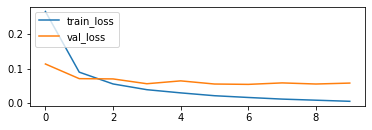

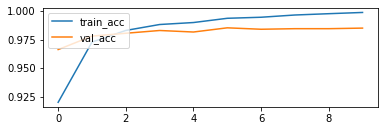

In [36]:
#plot loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

#plot accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()